# Importing libraries and dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
dataset=pd.read_csv("D:\PESUIO-ML\spotify.csv")
dataset

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [4]:
#data preprocessing
dataset.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
dataset.describe() #Numerical data

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [7]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X)
print(y)

[[0 '5SuOikwiRyPMVoIQDJUgSV' 'Gen Hoshino' ... 0.715 87.917 4]
 [1 '4qPNDBW1i3p13qLCt0Ki3A' 'Ben Woodward' ... 0.267 77.489 4]
 [2 '1iJBSr7s7jYXzM8EGcbK5b' 'Ingrid Michaelson;ZAYN' ... 0.12 76.332 4]
 ...
 [113997 '6x8ZfSoqDjuNa5SVP5QjvX' 'Cesária Evora' ... 0.743 132.378 4]
 [113998 '2e6sXL2bYv4bSz6VTdnfLs' 'Michael W. Smith' ... 0.413 135.96 4]
 [113999 '2hETkH7cOfqmz3LqZDHZf5' 'Cesária Evora' ... 0.708 79.198 4]]
['acoustic' 'acoustic' 'acoustic' ... 'world-music' 'world-music'
 'world-music']


In [6]:
#Number of unique values in each column
dataset.nunique(axis=0) 

Unnamed: 0          114000
track_id             89741
artists              31437
album_name           46579
track_name           73602
popularity             101
duration_ms          50697
explicit                 2
danceability          1174
energy                2083
key                     12
loudness             19480
mode                     2
speechiness           1489
acousticness          5061
instrumentalness      5346
liveness              1722
valence               1790
tempo                45653
time_signature           5
track_genre            114
dtype: int64

dataset mean
33.2385350877193


Text(0, 0.5, 'danceability')

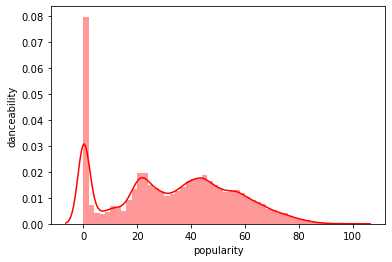

In [8]:
print("dataset mean")
print(dataset['popularity'].mean())
sns.distplot(dataset['popularity'],color='red')
plt.xlabel('popularity')
plt.ylabel('danceability')

In [9]:
mean=[]
def sample_mean(sample_size,no_of_sample_means):
    for i in range(no_of_sample_means):
        sample_popularity=dataset['popularity'].sample(n=sample_size)
        sample_mean=sample_popularity.mean()
        mean.append(sample_mean)
    return mean

Text(0, 0.5, 'danceability')

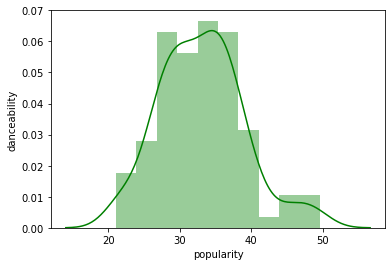

In [10]:
mean_2=sample_mean(sample_size=10,no_of_sample_means=100)
sns.distplot(mean_2,color='g')
plt.xlabel('popularity')
plt.ylabel('danceability')

In [16]:
mu=1000
sigma=100
sample=10000
np.random.seed(0)
height_duration_ms=np.random.normal(mu,sigma,sample).astype(int)
mu=2000
sigma=200
sample=20000
np.random.seed(1)
height_tempo=np.random.normal(mu,sigma,sample).astype(int)
height_duration_ms
height_tempo

array([2324, 1877, 1894, ..., 2481, 2176, 1980])

In [20]:
gym=pd.spotify({'height_duration':height_duration_ms,'height_tempo':height_tempo})
gym
gym.hist()
gym.plot.hist()

AttributeError: module 'pandas' has no attribute 'spotify'

In [23]:
print(dataset[0:100]['album_name'])

0                                                Comedy
1                                      Ghost (Acoustic)
2                                        To Begin Again
3     Crazy Rich Asians (Original Motion Picture Sou...
4                                               Hold On
                            ...                        
95                               Chill Christmas Dinner
96                                      sadsadchristmas
97                         Christmas Country Songs 2022
98                                    Del gusto de mamá
99                           OO's Music Grandi Successi
Name: album_name, Length: 100, dtype: object


In [25]:
print(dataset.tail(100))

        Unnamed: 0                track_id  \
113900      113900  5lORa4H99zsSobiyanlsgk   
113901      113901  0k0Eiw6sJJUYyKcVzDILD4   
113902      113902  7pYtl9OXETa8itI4iFjMhJ   
113903      113903  0jwJrWjeJLF9KmvVh5cYDc   
113904      113904  1SuyvMeuls9KdpGBTbtyVw   
...            ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs   
113999      113999  2hETkH7cOfqmz3LqZDHZf5   

                                     artists  \
113900                           Jason Upton   
113901                          Phil Wickham   
113902                 Hillsong Young & Free   
113903             Antonio Jesús Asiáin Sanz   
113904  Meditación: Por Mateo;Meditaciónessa   
...                                      ...   
113995                         Rainy Lullaby   
113996                         Rainy Lullaby   
113997         

In [26]:
dataset.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [30]:
dataset['time_signature'].sum()
dataset['energy'].mean()
dataset['artists'].count()
dataset['loudness'].max()
dataset['loudness'].min()
dataset['instrumentalness'].mode()
dataset['artists'].describe()


count          113999
unique          31437
top       The Beatles
freq              279
Name: artists, dtype: object

(array([4.0000e+00, 5.2000e+01, 2.6000e+02, 8.0400e+02, 1.7180e+03,
        3.8180e+03, 1.3029e+04, 4.6854e+04, 4.7104e+04, 3.5700e+02]),
 array([-49.531 , -44.1247, -38.7184, -33.3121, -27.9058, -22.4995,
        -17.0932, -11.6869,  -6.2806,  -0.8743,   4.532 ]),
 <BarContainer object of 10 artists>)

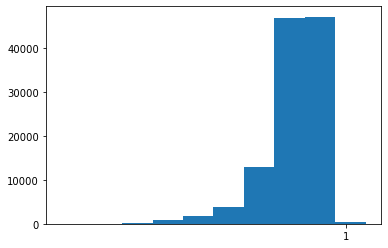

In [31]:
plt.boxplot(dataset['energy'])
plt.hist(dataset['loudness'])


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train
X_test
y_train
y_test

array(['sad', 'black-metal', 'acoustic', ..., 'singer-songwriter',
       'indian', 'ska'], dtype=object)

In [7]:
categorical_dataset = dataset.select_dtypes(include='object')
categorical_dataset

,track_id,artists,album_name,track_name,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,acoustic
...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,world-music
